# Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

## First, load the dataset.


Kaggle dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who/home

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [179]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [180]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,7432.027910,1.229209e+07,4.882301,4.920439,0.662532,12.191899
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,13410.150286,5.471908e+07,4.433359,4.532488,0.159108,3.125279
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.244000,2.800000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.546000,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2938 non-null float64
adult_mortality                    2938 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2938 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2938 non-null float64
measles                            2938 non-null int64
bmi                                2938 non-null float64
under_five_deaths                  2938 non-null int64
polio                              2938 non-null float64
total_expenditure                  2938 non-null float64
diphtheria                         2938 non-null float64
hiv/aids                           2938 non-null

## Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.


In [247]:
country_list = df.country.unique()
fill_list = ['life_expectancy','adult_mortality', 'alcohol','hepatitis_b','bmi','polio','total_expenditure','diphtheria','gdp','population','thinness__1_19_years','thinness_5_9_years','income_composition_of_resources','schooling','infant_deaths']


In [248]:
# Treat null values using interpolation.
for country in country_list:
    df.loc[df['country'] == country,fill_list] = df.loc[df['country'] == country,fill_list].interpolate()
    
# Drop remaining null values after interpolation.
df.dropna(inplace=True)

In [249]:
# Verifying null-values after applying above methods.
df.isnull().sum()

country                                0
year                                   0
status                                 0
life_expectancy                        0
adult_mortality                        0
infant_deaths                          0
alcohol                                0
percentage_expenditure                 0
hepatitis_b                            0
bmi                                    0
under_five_deaths                      0
polio                                  0
total_expenditure                      0
diphtheria                             0
hiv/aids                               0
gdp                                    0
population                             0
thinness__1_19_years                   0
thinness_5_9_years                     0
income_composition_of_resources        0
schooling                              0
winsorized_Life_Expectancy             0
winsorized_Adult_Mortality             0
winsorized_Infant_Deaths               0
winsorized_Alcoh

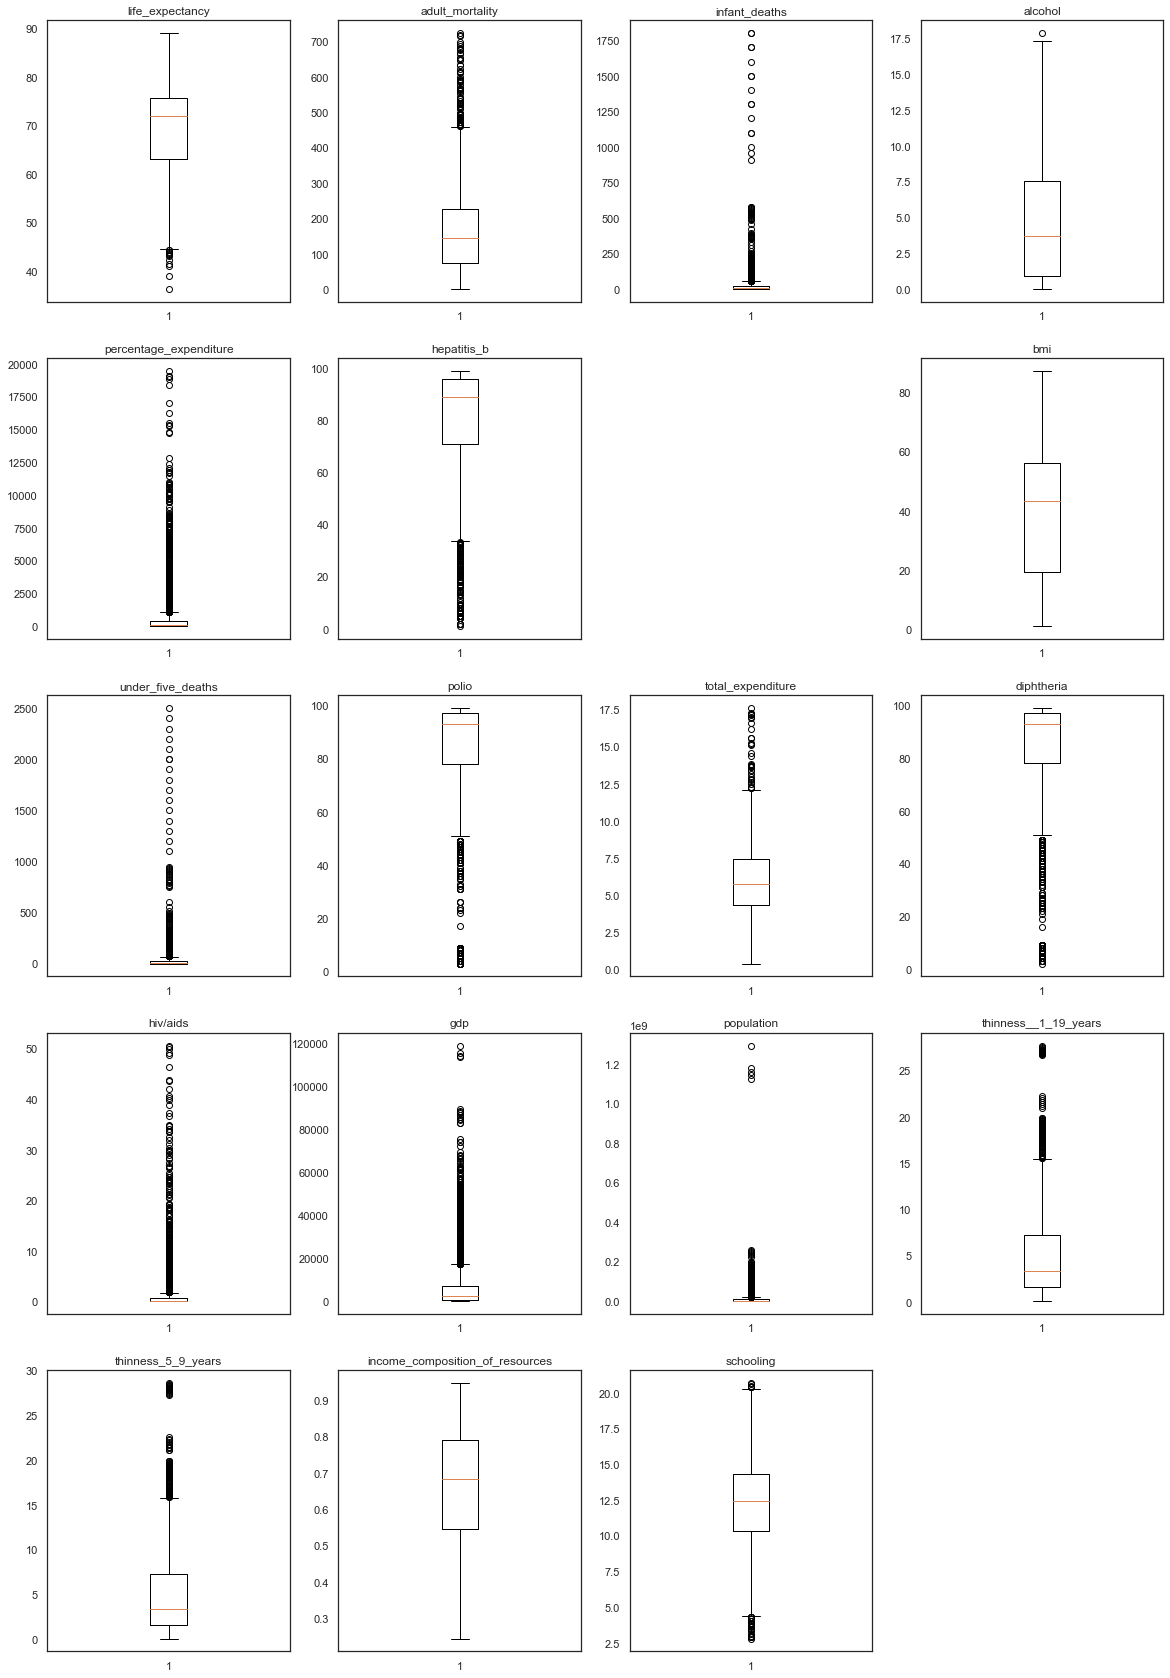

In [239]:
# Create a dictionary of columns.
col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,
            'hepatitis_b':6,'bmi':7,'bmi':8,'under_five_deaths':9,'polio':10,'total_expenditure':11,
            'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness__1_19_years':16,'thinness_5_9_years':17,
            'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [250]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/2938))

Number of outliers and percentage of it in life_expectancy : 12 and 0.4084411164057182
Number of outliers and percentage of it in adult_mortality : 82 and 2.791014295439074
Number of outliers and percentage of it in infant_deaths : 315 and 10.721579305650103
Number of outliers and percentage of it in alcohol : 1 and 0.03403675970047652
Number of outliers and percentage of it in percentage_expenditure : 389 and 13.240299523485364
Number of outliers and percentage of it in hepatitis_b : 248 and 8.441116405718176
Number of outliers and percentage of it in bmi : 0 and 0.0
Number of outliers and percentage of it in under_five_deaths : 394 and 13.410483321987746
Number of outliers and percentage of it in polio : 282 and 9.598366235534376
Number of outliers and percentage of it in total_expenditure : 35 and 1.191286589516678
Number of outliers and percentage of it in diphtheria : 301 and 10.245064669843432
Number of outliers and percentage of it in hiv/aids : 542 and 18.44792375765827
Number 

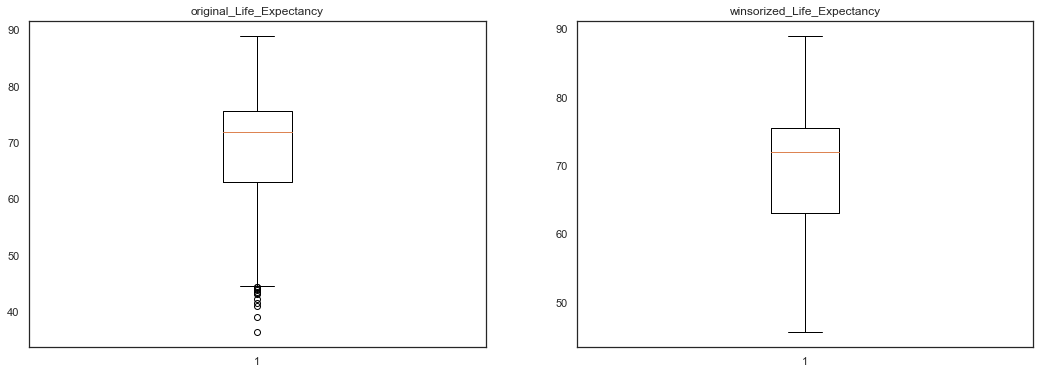

In [206]:
# Removing Outliers in the variables using Winsorization technique.

# Winsorize life_expectancy

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df['life_expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

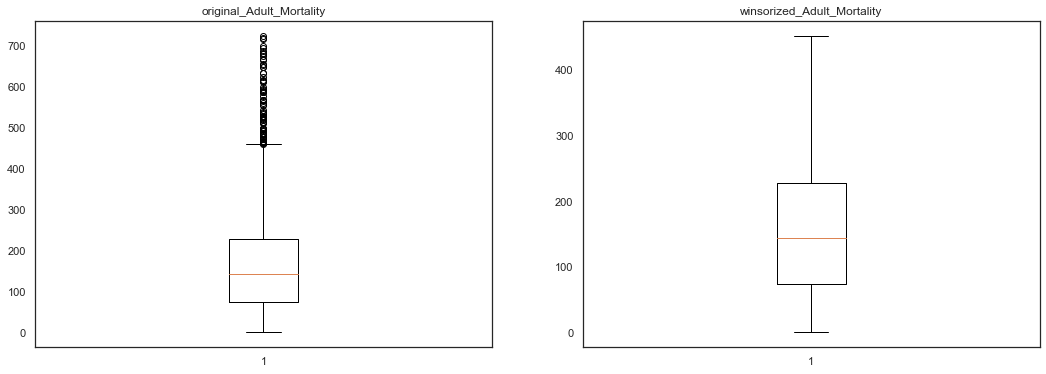

In [207]:
# Winsorize adult_mortality

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df['adult_mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

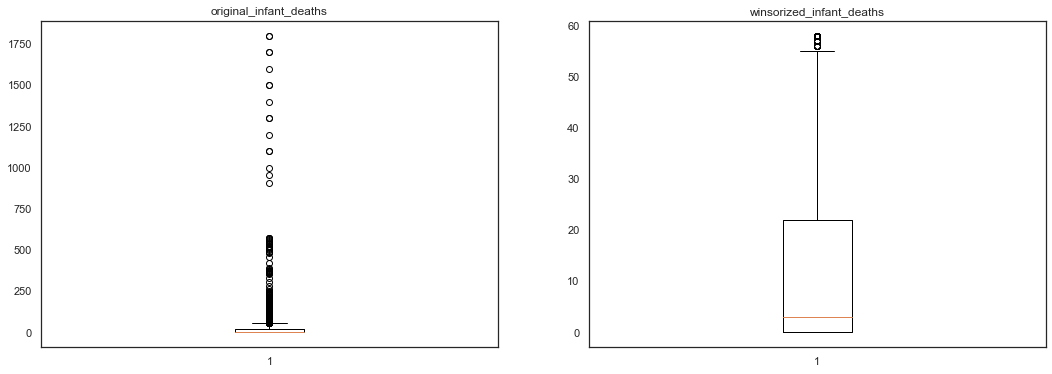

In [251]:
# Winsorize infant_deaths

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df['infant_deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_infant_deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_infant_deaths")

plt.show()

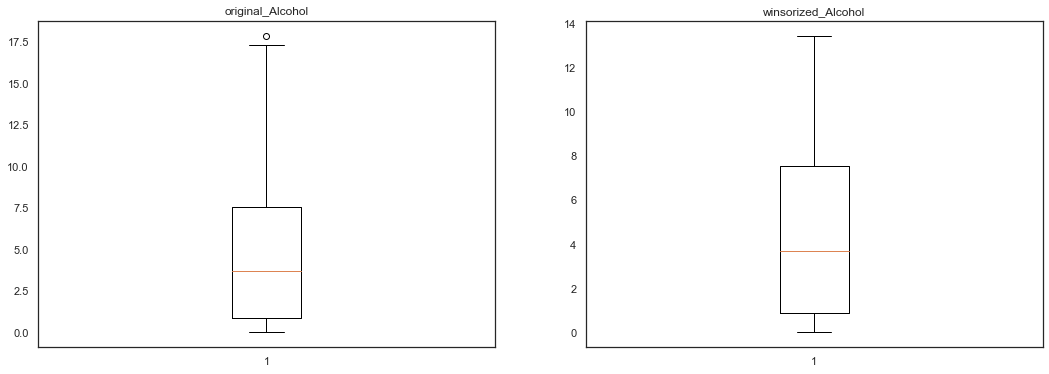

In [209]:
# Winsorize alcohol

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = df['alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

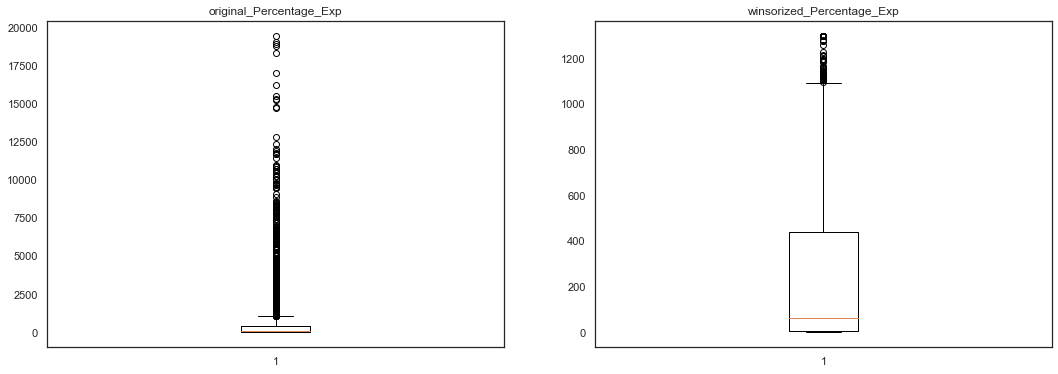

In [212]:
# Winsorize percentage_expenditure

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df['percentage_expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df['percentage_expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

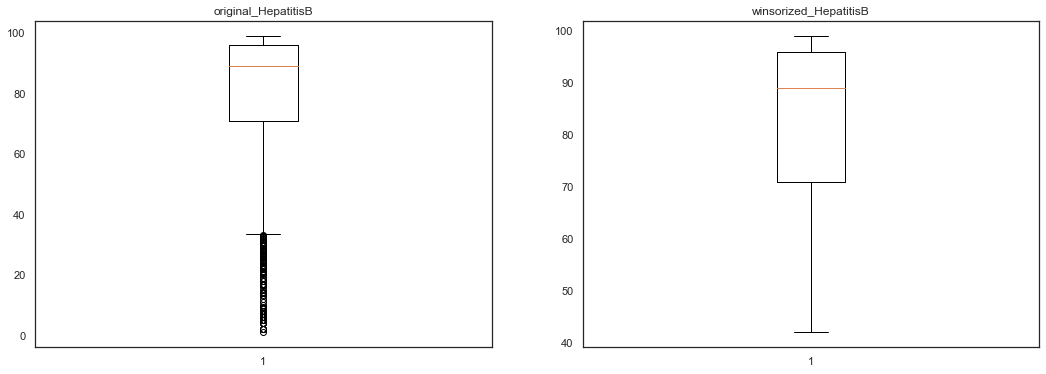

In [213]:
# Winsorize hepatitis_b

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df['hepatitis_b']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

In [237]:
# Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

#df = df.drop('measles',axis=1)

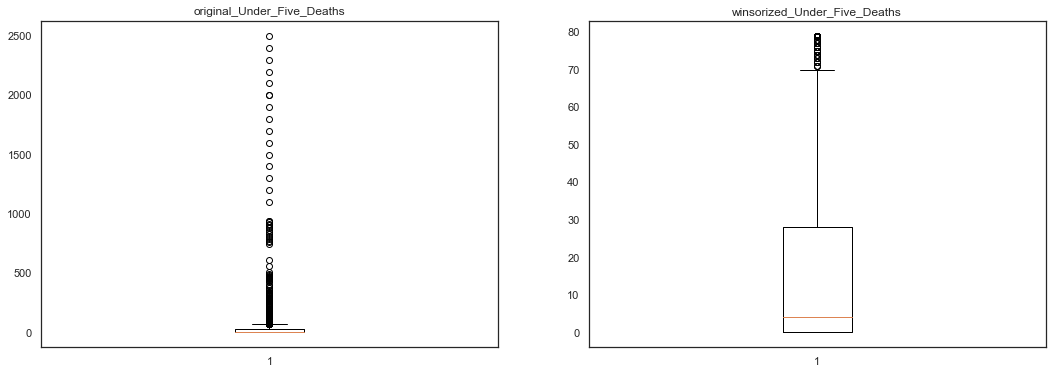

In [216]:
# Winsorize under_five_deaths

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['under_five_deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df['under_five_deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

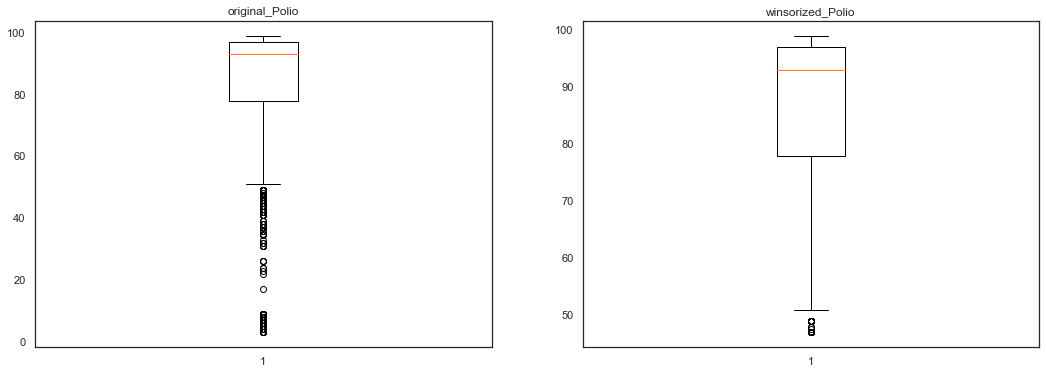

In [218]:
# Winsorize Polio

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df['polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df['polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

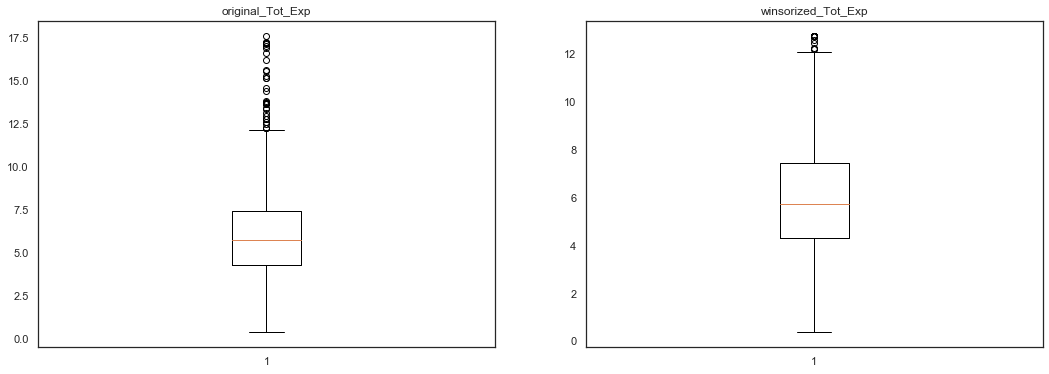

In [219]:
# Winsorize total_expenditure

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df['total_expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df['total_expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

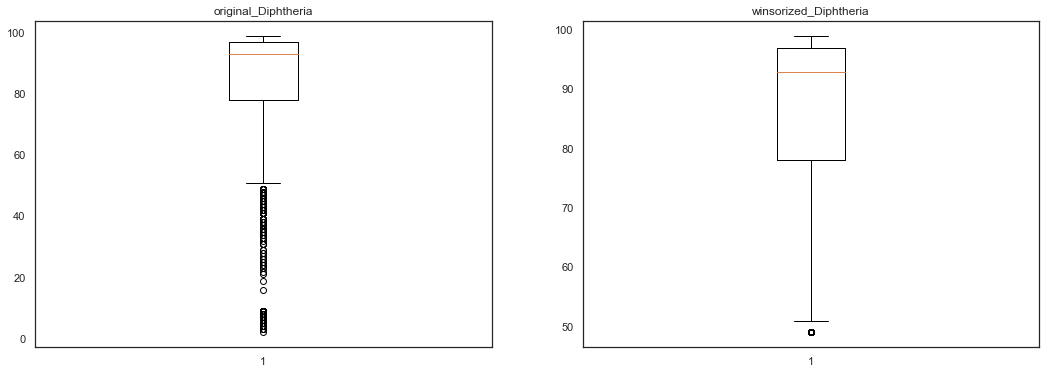

In [220]:
# Winsorize diphtheria

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df['diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df['diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

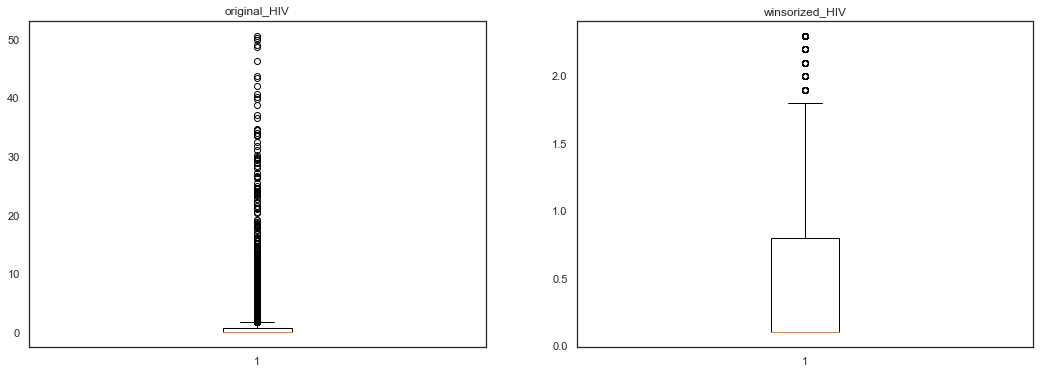

In [221]:
# Winsorize HIV/AIDS

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df['hiv/aids']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df['hiv/aids'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

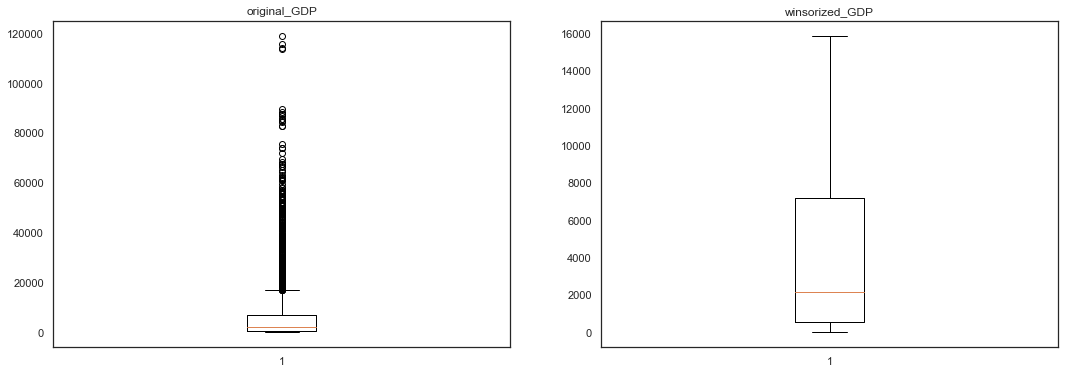

In [222]:
# Winsorize GDP

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df['gdp']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df['gdp'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

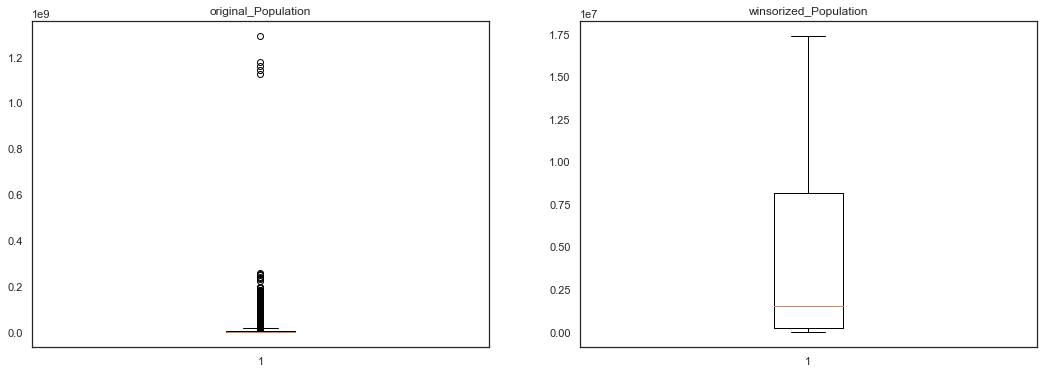

In [223]:
# Winsorize Population

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df['population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df['population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

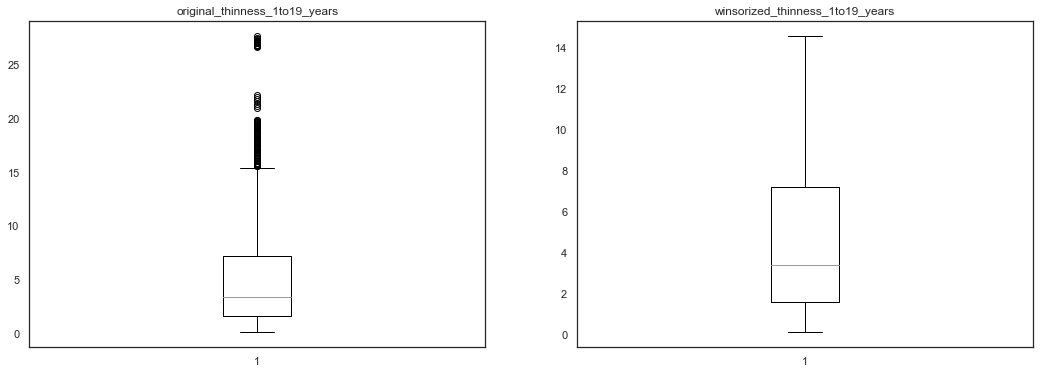

In [224]:
# Winsorize thinness_1to19_years

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness__1_19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df['thinness__1_19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

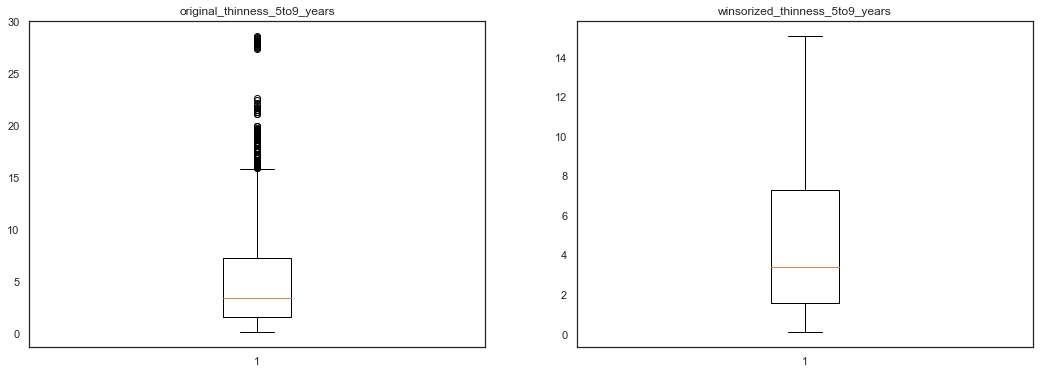

In [225]:
# Winsorize thinness_5to9_years

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5_9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df['thinness_5_9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

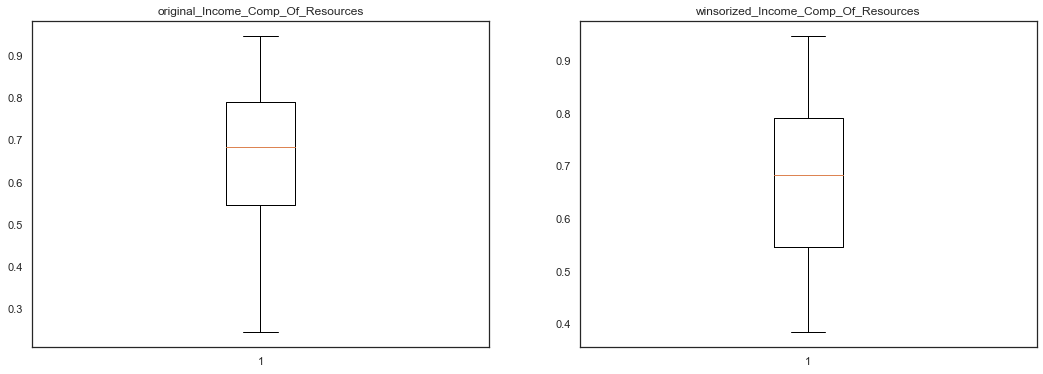

In [226]:
# Winsorize Income_Comp_Of_Resources

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df['income_composition_of_resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

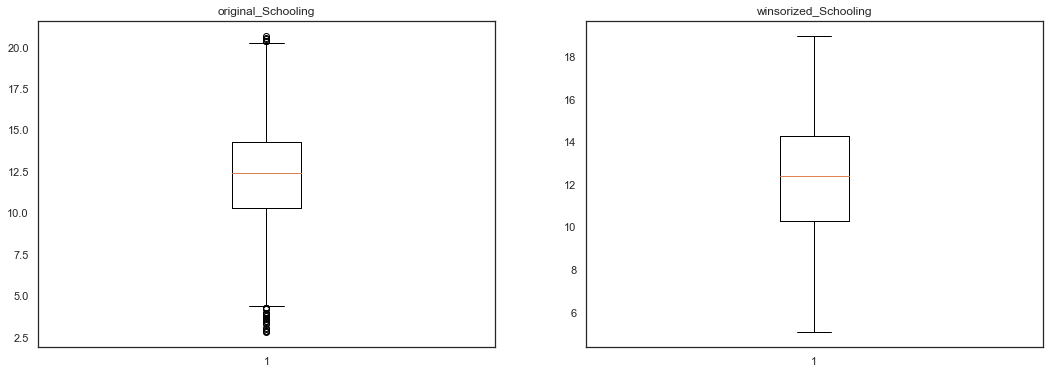

In [227]:
# Winsorize Schooling

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df['schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df['schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [252]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 315
Number of outliers after winsorization : 0
Number of outliers after winsorization : 389
Number of outliers after winsorization : 0
Number of outliers after winsorization : 394
Number of outliers after winsorization : 282
Number of outliers after winsorization : 35
Number of outliers after winsorization : 301
Number of outliers after winsorization : 542
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [241]:
# Adding winsorized variables to the data frame.
df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df['winsorized_Alcohol'] = winsorized_Alcohol
df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df['winsorized_HepatitisB'] = winsorized_HepatitisB
df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df['winsorized_Polio'] = winsorized_Polio
df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df['winsorized_Diphtheria'] = winsorized_Diphtheria
df['winsorized_HIV'] = winsorized_HIV
df['winsorized_GDP'] = winsorized_GDP
df['winsorized_Population'] = winsorized_Population
df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df['winsorized_Schooling'] = winsorized_Schooling

### The number of outliers decreased dramatically after the log transformation.

## Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [242]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,bmi,under_five_deaths,polio,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,38.29869,42.035739,82.474643,...,84.996912,5.919215,85.118740,0.613138,4797.546253,5.045048e+06,4.719677,4.753987,0.665043,12.201076
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,19.99140,160.445548,23.420689,...,16.397980,2.369079,15.963752,0.843100,5542.610925,6.324702e+06,3.901667,3.977301,0.154027,3.066288
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,1.00000,0.000000,3.000000,...,47.000000,0.370000,49.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.384000,5.062500
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,19.32500,0.000000,78.000000,...,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.546000,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,43.25000,4.000000,93.000000,...,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,56.10000,28.000000,97.000000,...,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,87.30000,2500.000000,99.000000,...,99.000000,12.770000,99.000000,2.300000,15893.865600,1.741527e+07,14.605882,15.100000,0.948000,19.000000


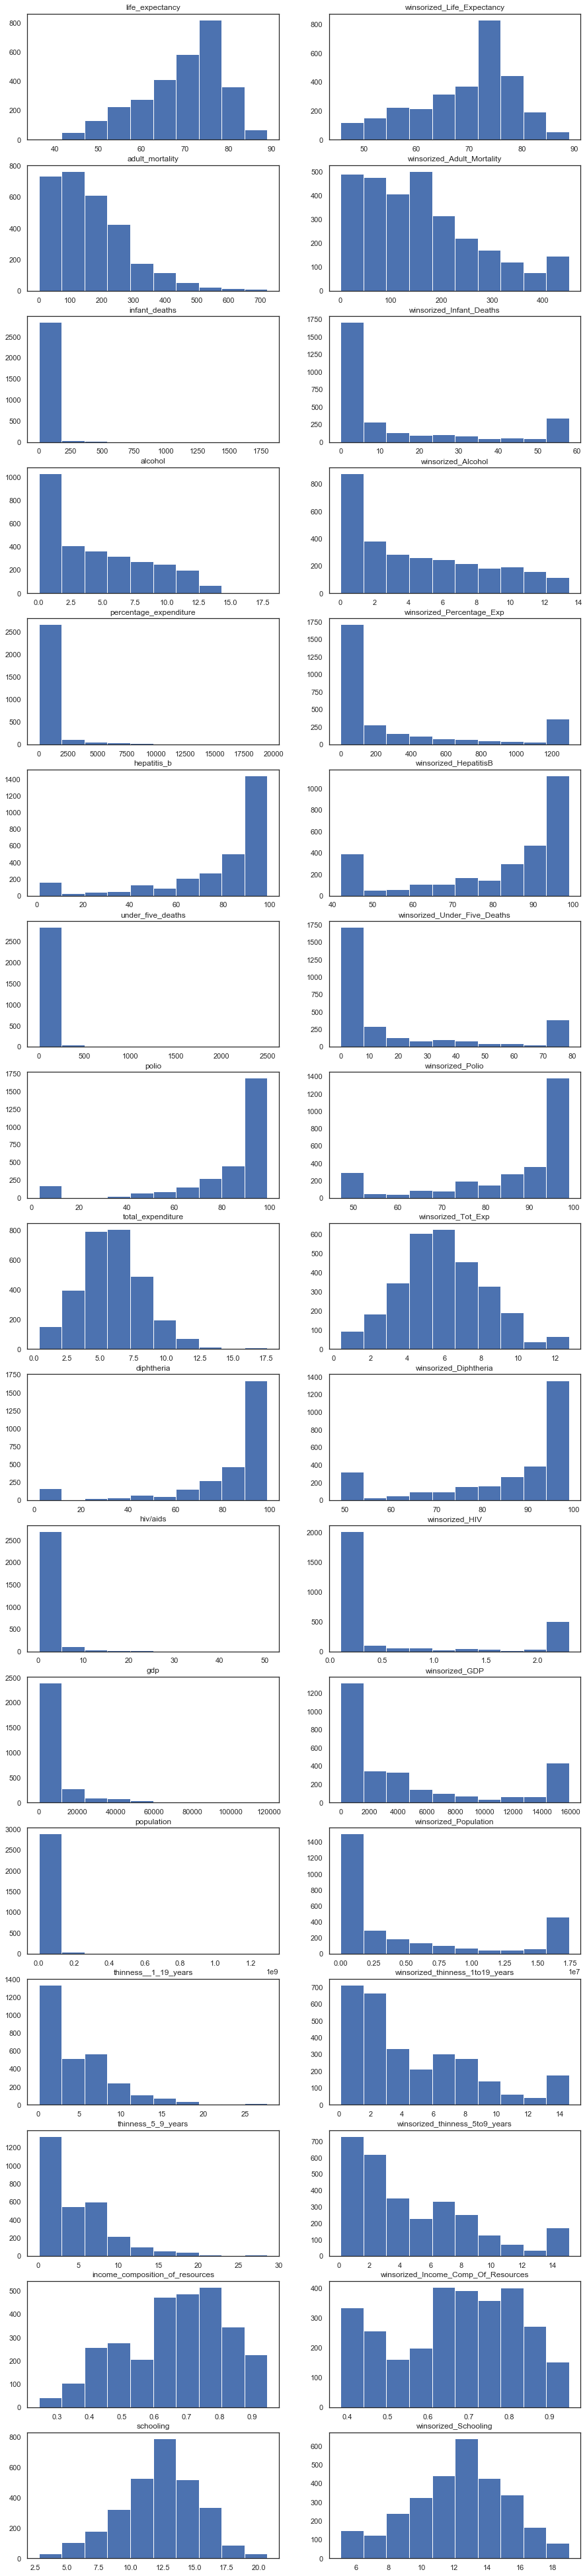

In [245]:
# Distribution of each numerical variable.
all_col = ['life_expectancy','winsorized_Life_Expectancy','adult_mortality','winsorized_Adult_Mortality','infant_deaths',
         'winsorized_Infant_Deaths','alcohol','winsorized_Alcohol','percentage_expenditure','winsorized_Percentage_Exp','hepatitis_b',
         'winsorized_HepatitisB','under_five_deaths','winsorized_Under_Five_Deaths','polio','winsorized_Polio','total_expenditure',
         'winsorized_Tot_Exp','diphtheria','winsorized_Diphtheria','hiv/aids','winsorized_HIV','gdp','winsorized_GDP',
         'population','winsorized_Population','thinness__1_19_years','winsorized_thinness_1to19_years','thinness_5_9_years',
         'winsorized_thinness_5to9_years','income_composition_of_resources','winsorized_Income_Comp_Of_Resources',
         'schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [246]:
df.describe(include=['O'])

,country,status
count,2938,2938
unique,193,2
top,Botswana,Developing
freq,16,2426


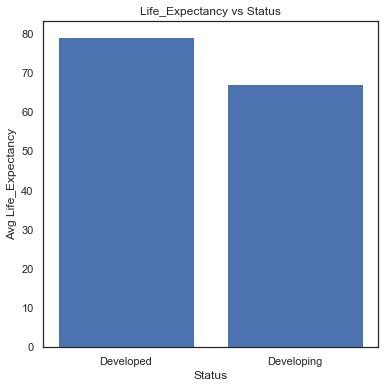

In [255]:
# Life_Expectancy vs. Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df.groupby('status')['status'].count().index,df.groupby('status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy vs Status")
plt.show()

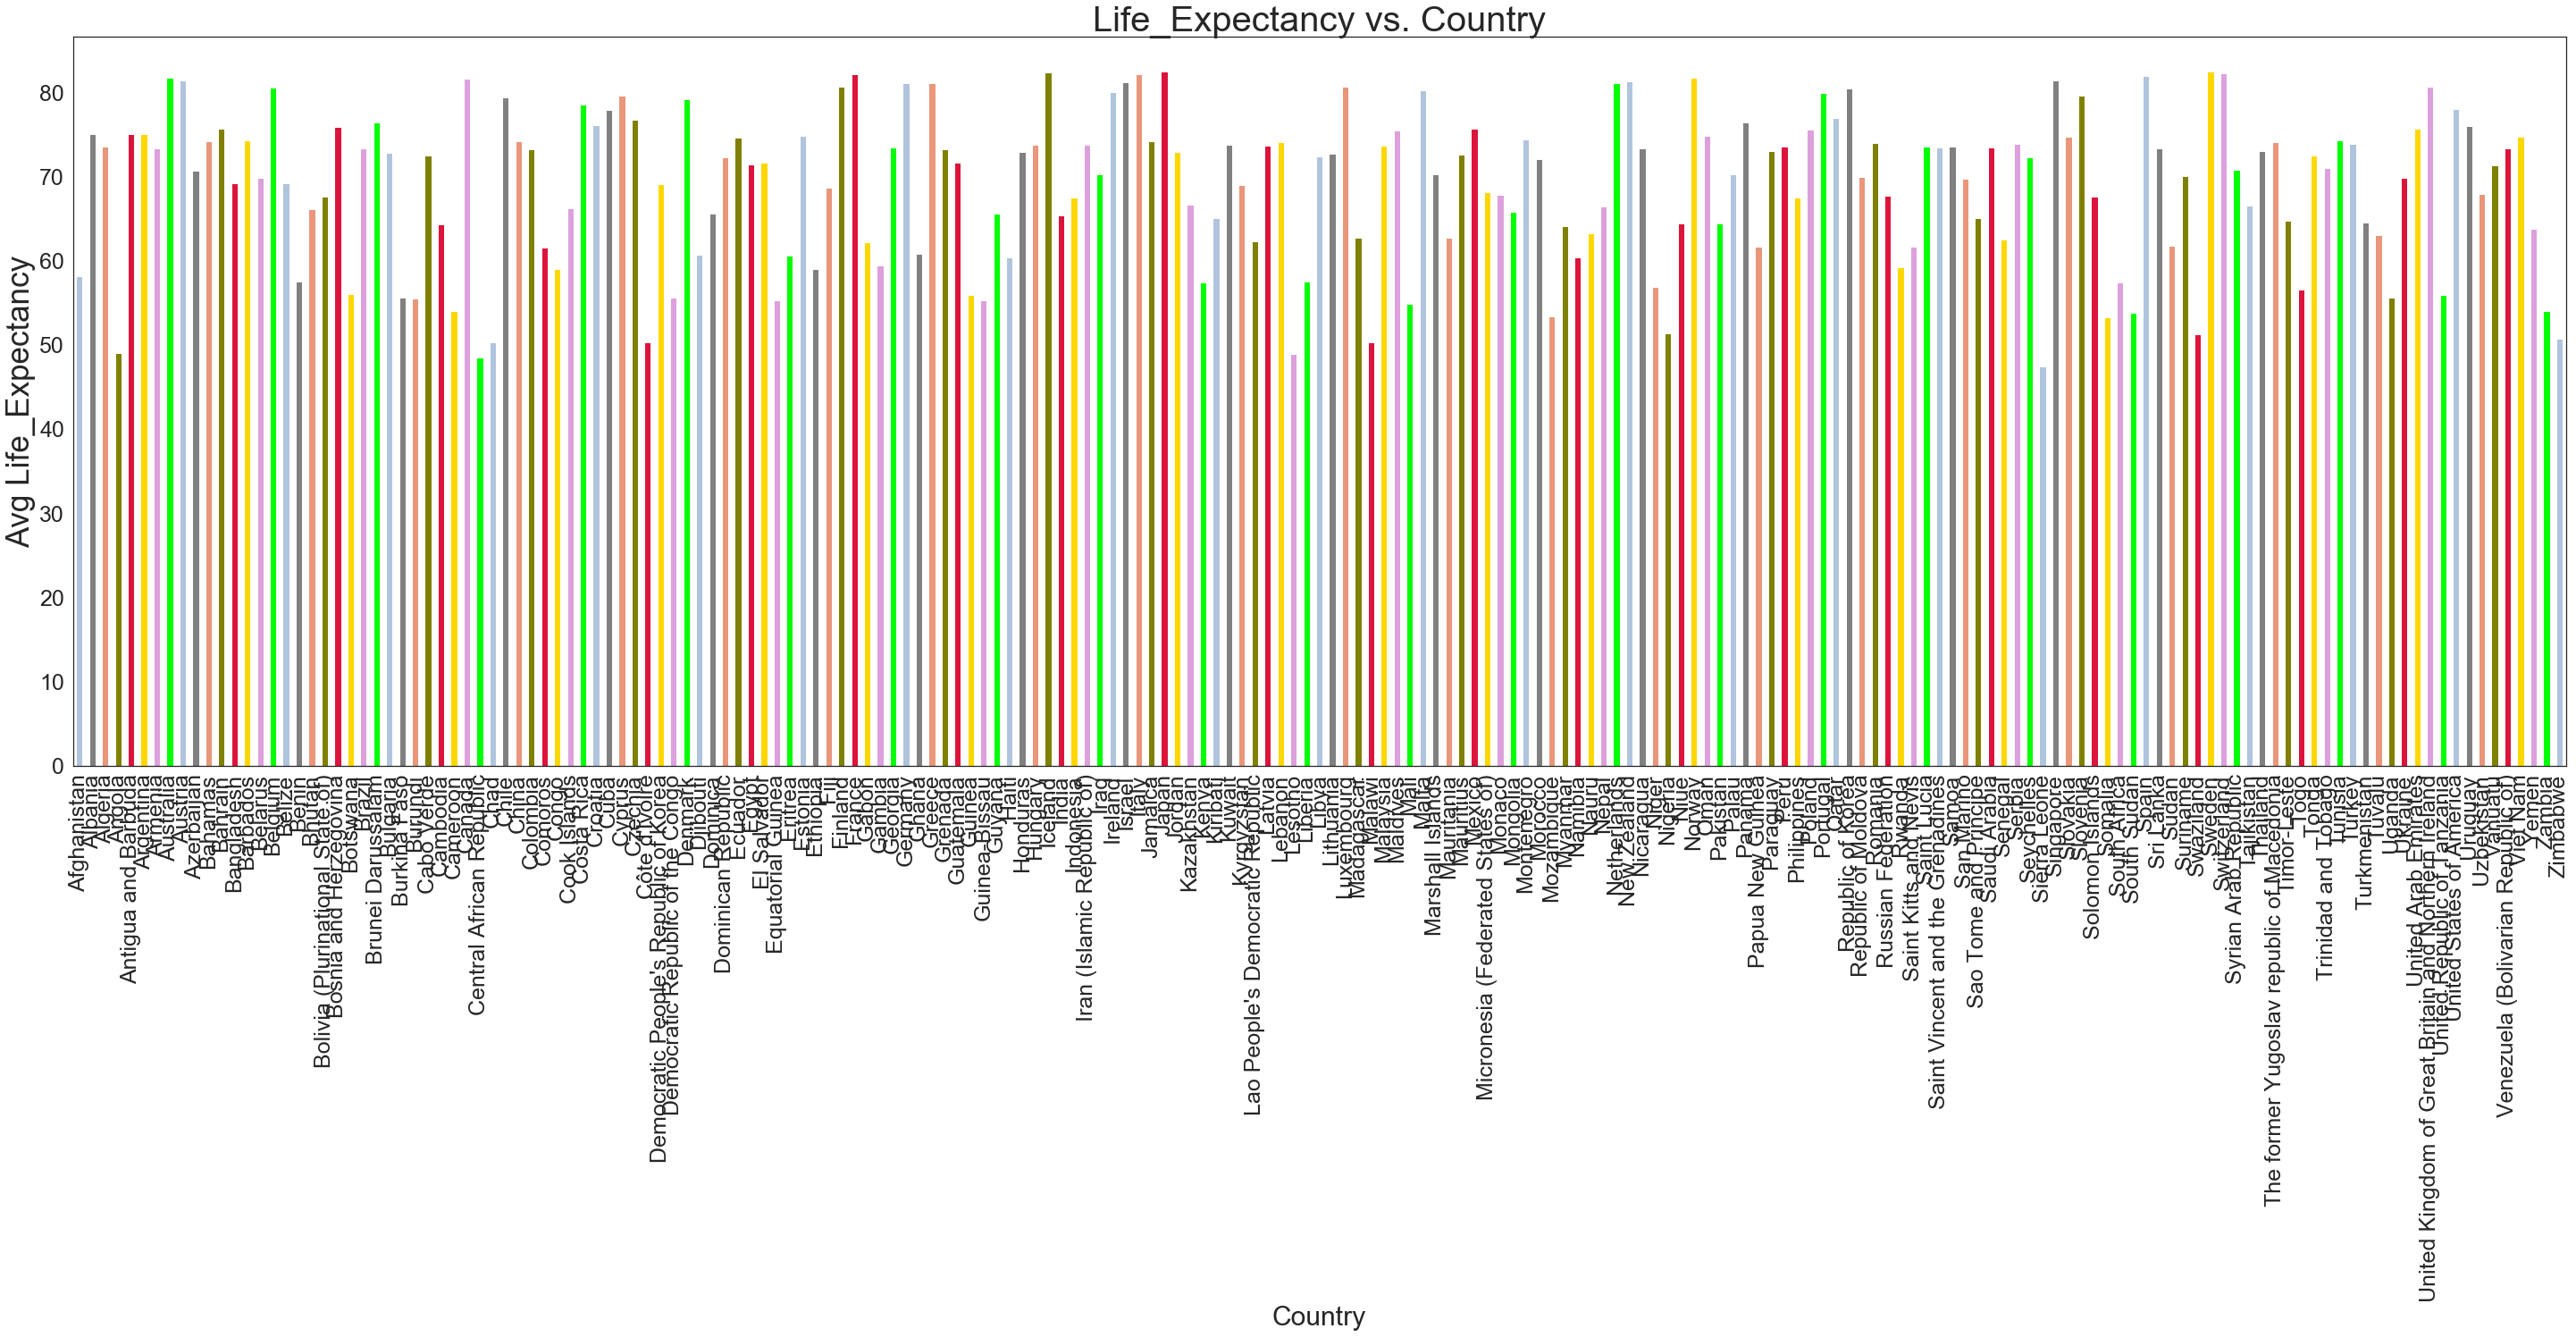

In [273]:
# Life_Expectancy per Country using bar plot.
colors = ['lightsteelblue', 'grey', 'darksalmon', 'olive', 'crimson', 'gold', 'plum', 'lime']
df_country = df.groupby('country')['winsorized_Life_Expectancy'].mean()
df_country.plot(kind='bar', figsize=(50,15), fontsize=25, color=colors)
plt.title("Life_Expectancy vs. Country",fontsize=40)
plt.xlabel("Country",fontsize=30)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

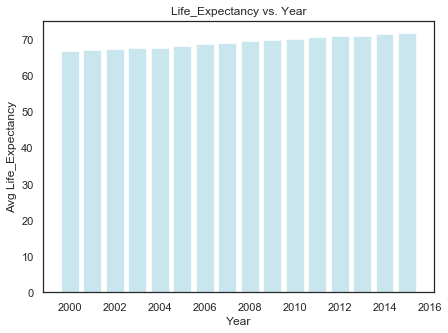

In [296]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('year')['year'].count().index,df.groupby('year')['winsorized_Life_Expectancy'].mean(),color='lightblue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy vs. Year")
plt.show()

Overall, it seem that life expectancy has risen worldwide every year since 2000

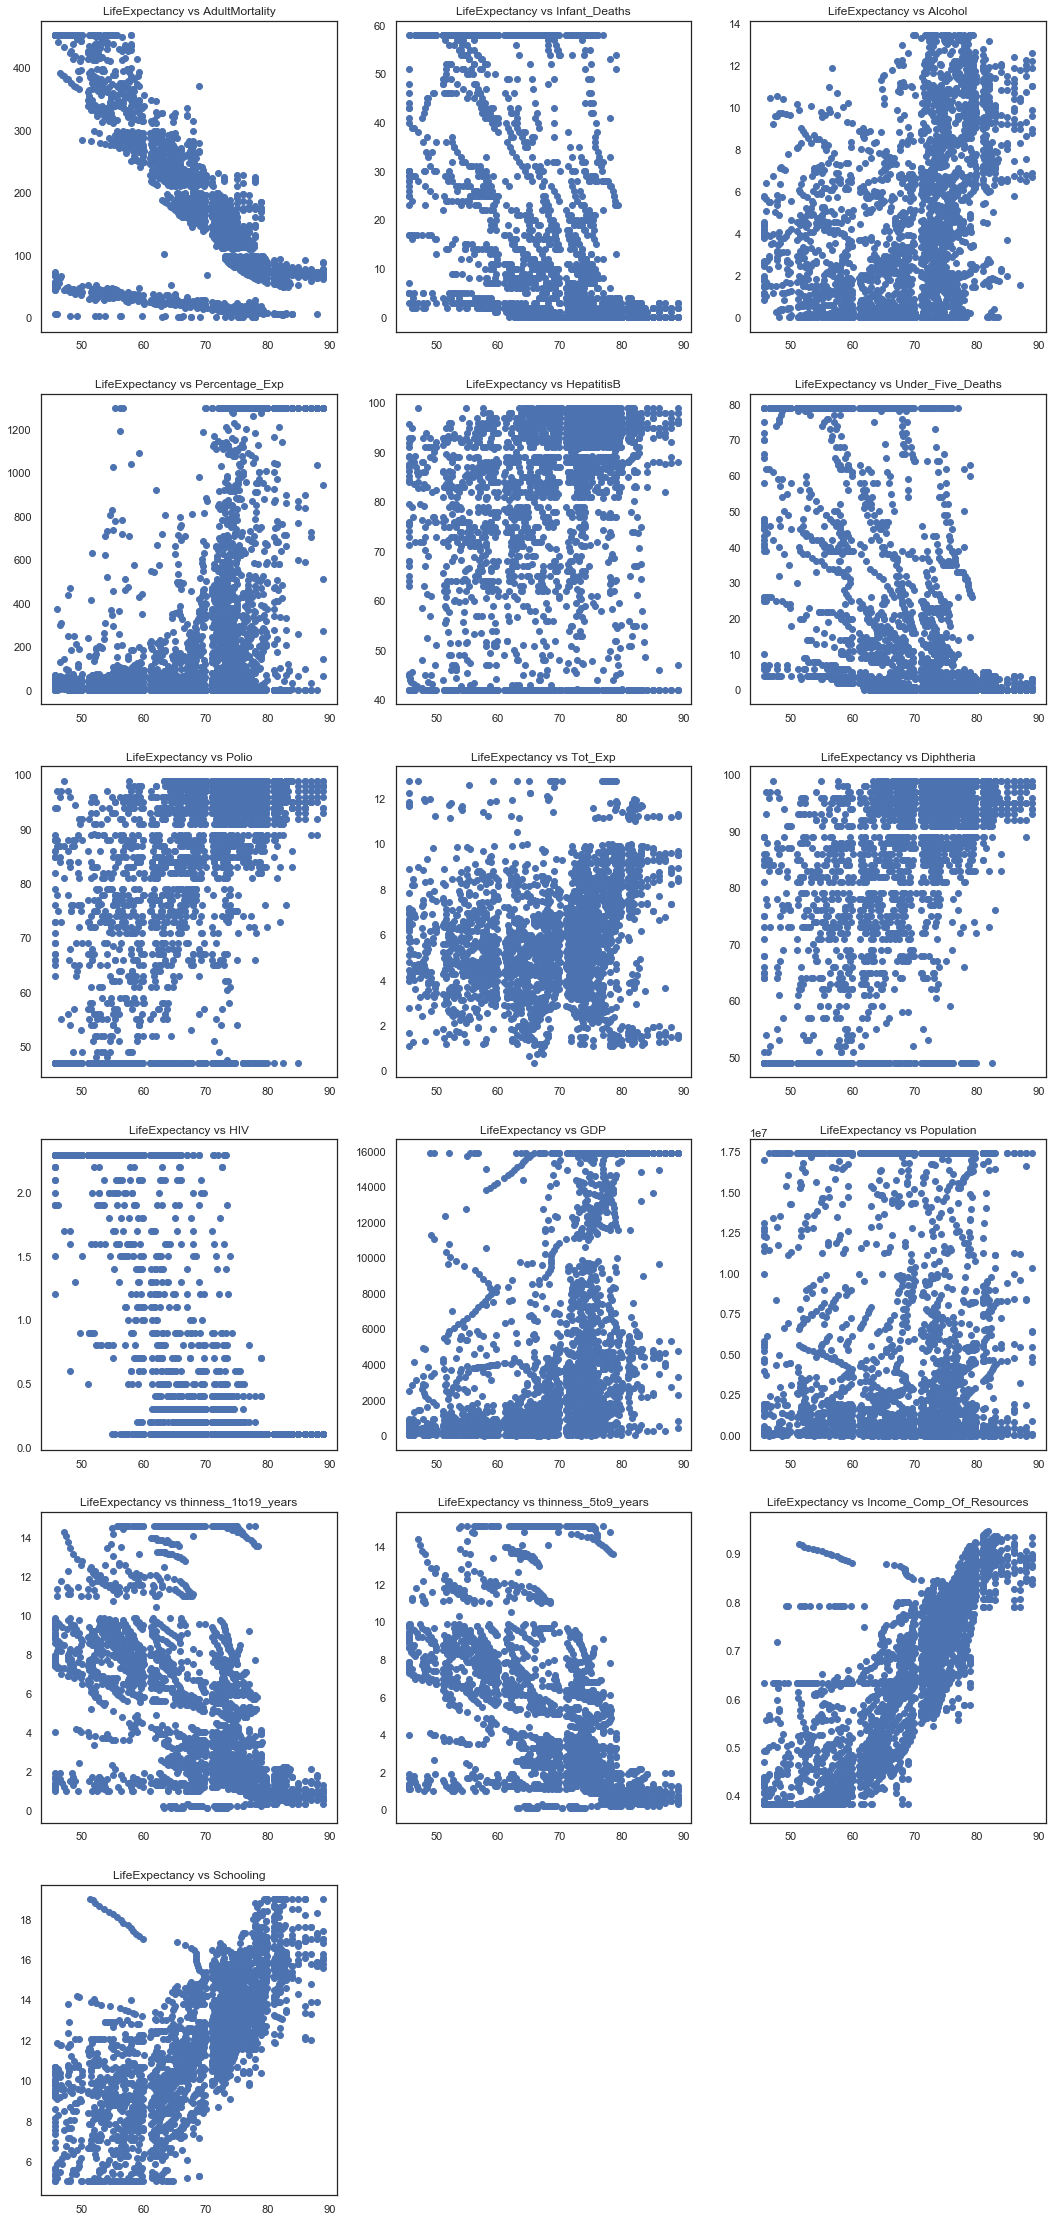

In [276]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

Adult Mortality, Income Comp, and Shooling have the most evident correlation to Life Expectancy

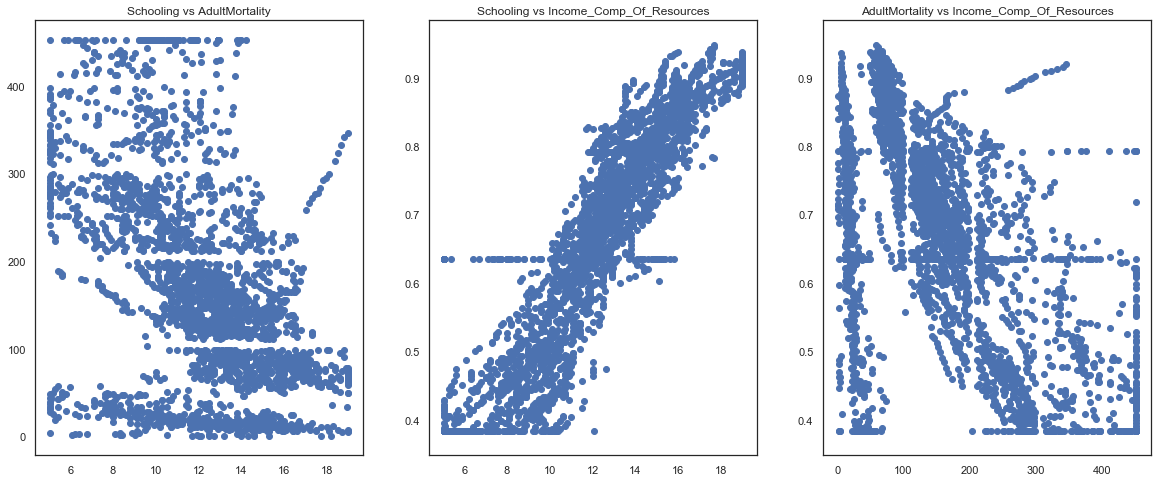

In [277]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df["winsorized_Adult_Mortality"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

In [280]:
# Correlation of winsorized variables
df_win = df.iloc[:,21:]
df_win['country'] = df['country']
df_win['year'] = df['year']
df_win['status'] = df['status']
df_win_num = df_win.iloc[:,:-3]
cormat = df_win_num.corr()

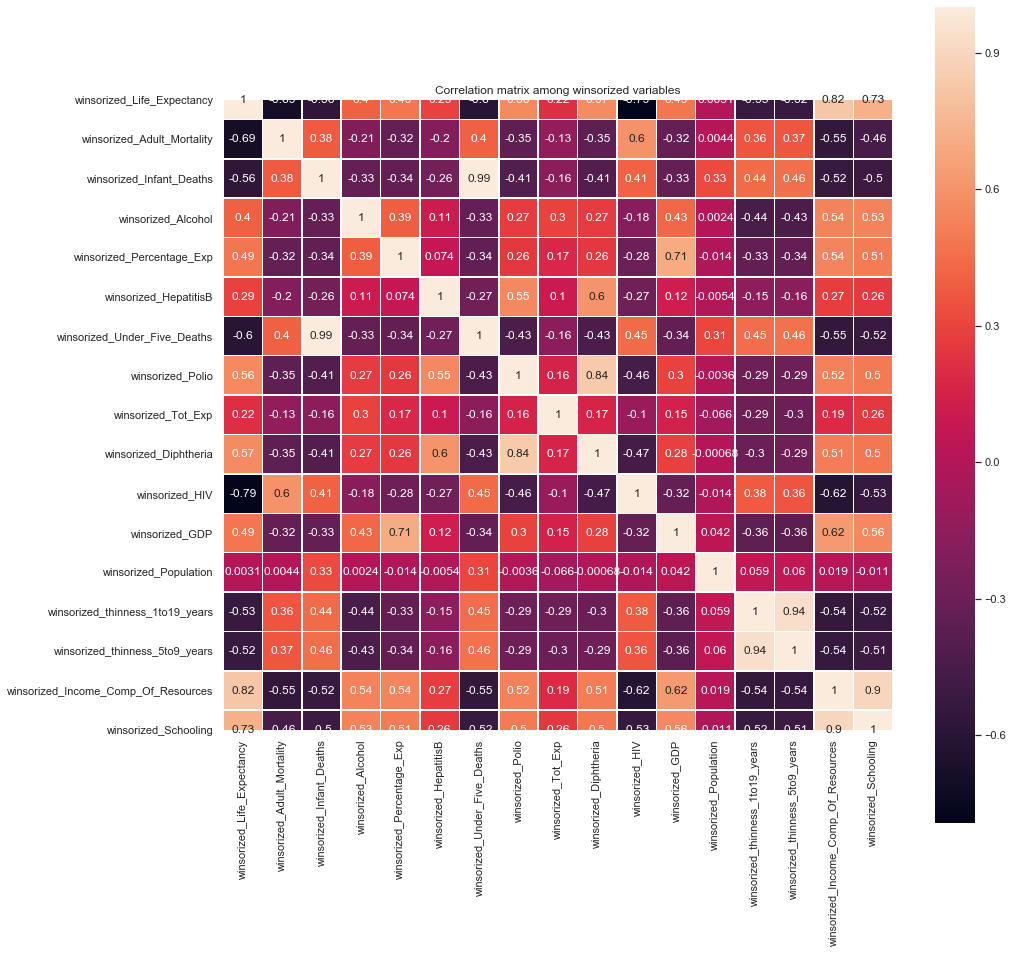

In [281]:
# Using heatmap to observe correlations.

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

## In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [84]:
df.groupby("status").mean()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.634141,2703.600380,83.806185,499.005859,51.803906,1.810547,93.736328,7.519257,93.476562,0.100000,20687.164283,7.298804e+06,1.320703,1.296680,0.847715,15.640031
Developing,2007.522671,67.107997,182.696002,36.384171,3.475699,323.470285,77.424251,2824.926216,35.448454,50.525144,80.097898,5.607859,79.875927,2.088664,4634.571264,1.334591e+07,5.633965,5.685223,0.589451,11.324796


In [283]:
round(df[['status','life_expectancy']].groupby(['status']).mean(),2)

,life_expectancy
status,
Developed,79.20
Developing,67.11


Developed countries have a higher life expectancy

In [287]:
# Finding the significance of difference of Average_Life_Expectancy 
#between Developed and Developing countries using t-test

stats.ttest_ind(df.loc[df['status']=='Developed','life_expectancy'],df.loc[df['status']=='Developing','life_expectancy'])

Ttest_indResult(statistic=29.83135900677773, pvalue=4.960292113465824e-171)

In [289]:
# Create a data frame with features.
feature_df = df[['status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources',
                 'winsorized_HIV','winsorized_Adult_Mortality']]

In [291]:
# Convert categorical values to numerical values using one-hot encoding for 'status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['status'],drop_first=True)],axis=1)
final = feature_df.drop('status',axis=1)
final.head()

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Developing,Developing
0,65.0,0.479,0.1,263.0,1,1
1,59.9,0.476,0.1,271.0,1,1
2,59.9,0.470,0.1,268.0,1,1
3,59.5,0.463,0.1,272.0,1,1
4,59.2,0.454,0.1,275.0,1,1


## Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

The 'status' of the country, be it developed or in a state of being developed, weighs heavy as a determinant for life expectancy and much more.

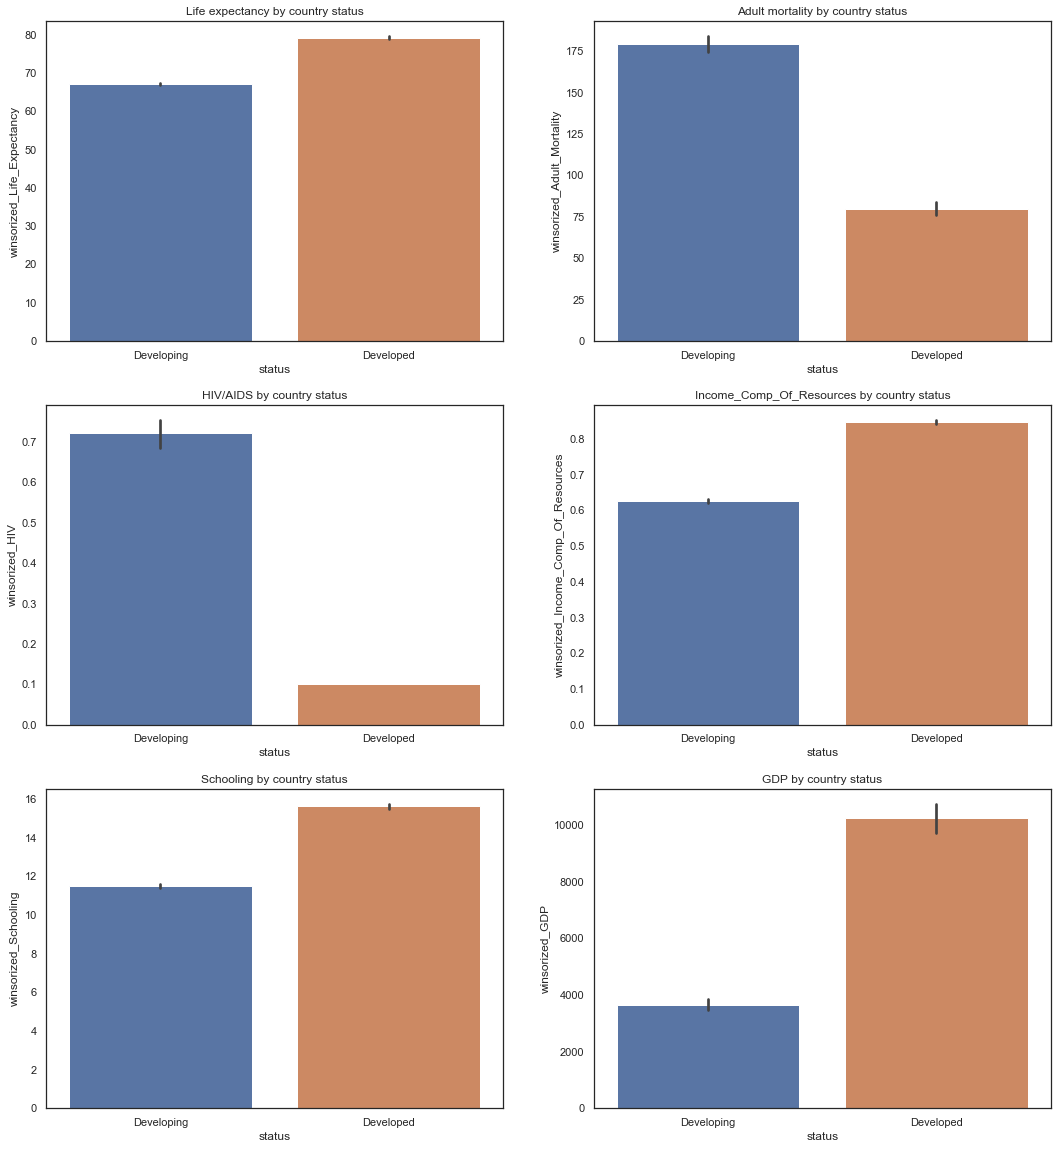

In [294]:
plt.figure(figsize=(18,20))

plt.subplot(3,2,1)
sns.barplot(df["status"], df["winsorized_Life_Expectancy"])
plt.title("Life expectancy by country status")

plt.subplot(3,2,2)
sns.barplot(df["status"], df["winsorized_Adult_Mortality"])
plt.title("Adult mortality by country status")

plt.subplot(3,2,3)
sns.barplot(df["status"], df["winsorized_HIV"])
plt.title("HIV/AIDS by country status")

plt.subplot(3,2,4)
sns.barplot(df["status"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("Income_Comp_Of_Resources by country status")

plt.subplot(3,2,5)
sns.barplot(df["status"], df["winsorized_Schooling"])
plt.title("Schooling by country status")

plt.subplot(3,2,6)
sns.barplot(df["status"], df["winsorized_GDP"])
plt.title("GDP by country status")

plt.show()